In [1]:
library(rtdists)

Warning message:
“package ‘rtdists’ was built under R version 3.4.3”

In [2]:
#function for neg log likelihood
diffusionloglik2=function(pars,rt,response){
    if (any(pars<0)) return(1e6+1e3*rnorm(1))
    ptrs=grep("v[1-9]",names(pars))
    ptrs2=grep("t0[1-9]",names(pars))
    eachn=length(rt)/length(ptrs)
    likelihoods=NULL
    for (i in c(1:length(ptrs))){
        if(i==1){
            rtNums=c(1,580)
        }
        else{
            rtNums=c(581,1106)
        }
        likelihoods=c(likelihoods,tryCatch(ddiffusion(rt[rtNums[1]:rtNums[2]],
                                                     response=response[rtNums[1]:rtNums[2]],
                                                     a=pars["a"],
                                                     v=pars[ptrs[i]],
                                                     t0=pars[ptrs2[i]],
                                                     z=0.5*pars["a"],
                                                     d=0,
                                                     sz=pars["sz"],
                                                     st0=pars["st0"],
                                                     sv=pars["sv"],
                                                     s=.1,precision=3),
                                          error=function(e) 0))
    }
    if (any(likelihoods==0)) return(1e6+1e3*rnorm(1))
    return(-sum(log(likelihoods)))    
}
                                           
#Generate starting values for params
sparms=c(runif(1,0.1,0.2),
        .5+rnorm(length(1:2),0,.05),
        .3+rnorm(length(1:2),0,.1),
        0.05,
        runif(1,0,.2),
        0.1)
names(sparms)=c("a",paste("v",1:2,sep=""),paste("t0",1:2,sep=""),"sz","st0","sv")

In [10]:
#function for neg log likelihood
diffusionloglik2=function(pars,rt,response){
    if (any(pars<0)) return(1e6+1e3*rnorm(1))
    ptrs=grep("v[1-9]",names(pars))
    eachn=length(rt)/length(ptrs)
    likelihoods=NULL
    for (i in c(1:length(ptrs))){
        if(i==1){
            rtNums=c(1,580)
        }
        else{
            rtNums=c(581,1106)
        }
        likelihoods=c(likelihoods,tryCatch(ddiffusion(rt[rtNums[1]:rtNums[2]],
                                                     response=response[rtNums[1]:rtNums[2]],
                                                     a=pars["a"],
                                                     v=pars[ptrs[i]],
                                                     t0=pars["t0"],
                                                     z=0.5*pars["a"],
                                                     d=0,
                                                     sz=pars["sz"],
                                                     st0=pars["st0"],
                                                     sv=pars["sv"],
                                                     s=.1,precision=3),
                                          error=function(e) 0))
    }
    if (any(likelihoods==0)) return(1e6+1e3*rnorm(1))
    return(-sum(log(likelihoods)))    
}

In [4]:
#Upload the data
data=read.csv('forcememD_example/testSubDat3.csv')
#str(data)
data2=na.omit(data)
data2=data2[data2$RT>.3,]


for(i in 1:nrow(data2)){
    if (data2$acc[i]==0){
        data2$response[i]="lower"
    }
    else{
        data2$response[i]="upper"
    }
}
data2$response=as.factor(data2$response)

data2$rt=data2$RT
str(data2)
head(data2)

'data.frame':	1106 obs. of  5 variables:
 $ acc     : num  1 1 1 1 1 1 1 1 0 1 ...
 $ RT      : num  1.048 1.074 0.941 1.144 1.379 ...
 $ Diff    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ response: Factor w/ 2 levels "lower","upper": 2 2 2 2 2 2 2 2 1 2 ...
 $ rt      : num  1.048 1.074 0.941 1.144 1.379 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:129] 1 22 23 27 29 34 37 48 49 51 ...
  .. ..- attr(*, "names")= chr [1:129] "1" "22" "23" "27" ...


,acc,RT,Diff,response,rt
2,1,1.0479550,1,upper,1.0479550
3,1,1.0743719,1,upper,1.0743719
4,1,0.9406309,1,upper,0.9406309
5,1,1.1444352,1,upper,1.1444352
6,1,1.3788037,1,upper,1.3788037
7,1,1.5418723,1,upper,1.5418723


In [47]:
#Get some data info for later on
diff1=data2[data2$Diff==1,]
diff2=data2[data2$Diff==2,]
#str(diff1)
#str(diff2)
nDiff=2
qtiles=seq(from=.1, to=.9, by=.2)
pUp=pLow=rep(0,nDiff)
pfPlot=matrix(0,length(qtiles),nDiff*2)

pUp[2]=sum(diff1$response=="upper")/nrow(diff1)
pUp[1]=sum(diff2$response=="upper")/nrow(diff2)
pLow[2]=sum(diff1$response=="lower")/nrow(diff1)
pLow[1]=sum(diff2$response=="lower")/nrow(diff2)

pfPlot[,4]=quantile(diff1$rt[diff1$response=="upper"])*1000
pfPlot[,1]=quantile(diff1$rt[diff1$response=="lower"])*1000
pfPlot[,3]=quantile(diff2$rt[diff2$response=="upper"])*1000
pfPlot[,2]=quantile(diff2$rt[diff2$response=="lower"])*1000

In [48]:
pfPlot
pUp
pLow

625.7407,1030.541,794.6326,501.5736
1096.5108,1569.487,1369.3979,811.0915
1296.0377,1683.864,1597.2869,969.2059
1391.0758,1805.961,1769.5892,1187.5085
1666.0313,1999.854,1996.8768,1983.1425


[1] 0.7357414 0.9500000

[1] 0.2642586 0.0500000

NULL

NULL

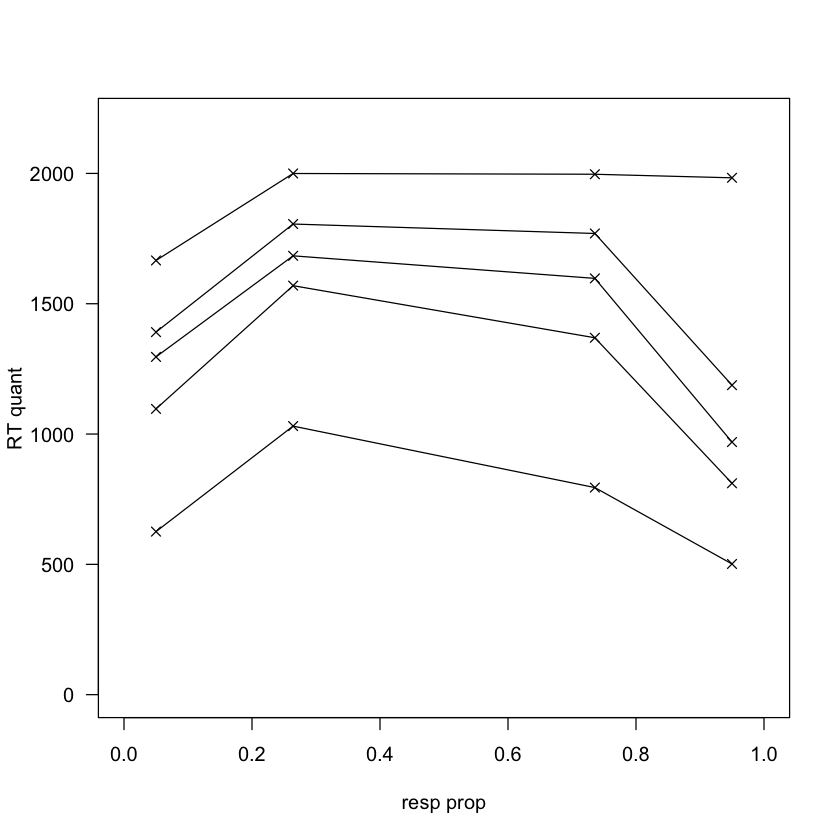

In [49]:
plot(0,0,type="n",las=1,
    ylim=c(0,max(pfPlot)+200),
    xlim=c(0,1),
    xlab="resp prop",
    ylab="RT quant")
apply(pfPlot,1,FUN=function(x) points(c(rev(pLow),pUp),x,pch=4))
apply(pfPlot,1,FUN=function(x) lines(c(rev(pLow),pUp),x) )

In [7]:
#NOw I need to quickly rearrange the data by difficulty 
#to separately estimate those and then get the num trials of each
easyN=nrow(diff1)
hardN=nrow(diff2)

dataNew=rbind(diff1,diff2)
str(dataNew)
easyN

'data.frame':	1106 obs. of  5 variables:
 $ acc     : num  1 1 1 1 1 1 1 1 0 1 ...
 $ RT      : num  1.048 1.074 0.941 1.144 1.379 ...
 $ Diff    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ response: Factor w/ 2 levels "lower","upper": 2 2 2 2 2 2 2 2 1 2 ...
 $ rt      : num  1.048 1.074 0.941 1.144 1.379 ...
 - attr(*, "na.action")=Class 'omit'  Named int [1:129] 1 22 23 27 29 34 37 48 49 51 ...
  .. ..- attr(*, "names")= chr [1:129] "1" "22" "23" "27" ...


[1] 580

In [11]:
#Generate starting values for these params (drawing from random dist with certain means and std)
#Generate starting values for params
sparms=c(runif(1,0.1,0.5),
        .3+rnorm(2,0,.1),
        .3+rnorm(2,0,.1),
        0.05,
        runif(1,0,.2),
        0.1)
sparms
names(sparms)=c("a",paste("v",1:nDiff,sep=""),paste("t0",1:nDiff,sep=""),"sz","st0","sv")

[1] 0.4213664 0.2238342 0.4493174 0.2696216 0.1900350 0.0500000 0.1130467
[8] 0.1000000

In [12]:
#Generate starting values for these params (drawing from random dist with certain means and std)
#Generate starting values for params
sparms=c(runif(1,0.1,0.5),
        .3+rnorm(2,0,.1),
        .3,
        0.05,
        runif(1,0,.2),
        0.1)
sparms
names(sparms)=c("a",paste("v",1:nDiff,sep=""),"t0","sz","st0","sv")

[1] 0.4986815 0.3819107 0.3286484 0.3000000 0.0500000 0.1692182 0.1000000

In [13]:
fit2rts = optim(sparms, diffusionloglik2,gr=NULL,rt=dataNew$rt,response=dataNew$response)
round(fit2rts$par,3)

a    v1    v2    t0    sz   st0    sv 
0.170 0.294 0.062 0.458 0.054 0.755 0.060

NULL

NULL

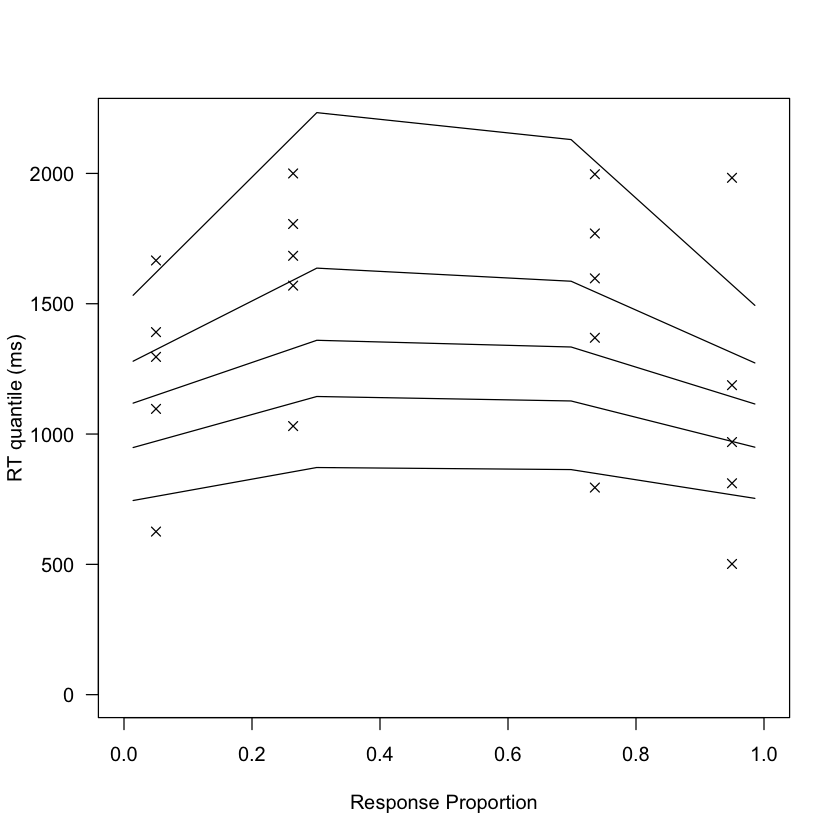

In [91]:
#Now let's try to fit the data just like we did before
#Now obtrain predictions from model for plotting
#First maximum proportion
vfitted=fit2rts$par[paste("v",1:nDiff,sep="")]
maxUp=pdiffusion(rep(Inf,length(vfitted)),response="upper",
                a=fit2rts$par["a"],
                v=vfitted,
                t0=fit2rts$par["t0"],
                z=0.5*fit2rts$par["a"],
                d=0,
                sz=fit2rts$par["sz"],
                sv=fit2rts$par["sv"],
                st0=fit2rts$par["st0"],s=.1,precision=3)
maxLr=pdiffusion(rep(Inf,length(vfitted)),response="lower",
                a=fit2rts$par["a"],
                v=vfitted,
                t0=fit2rts$par["t0"],
                z=0.5*fit2rts$par["a"],
                d=0,
                sz=fit2rts$par["sz"],
                sv=fit2rts$par["sv"],
                st0=fit2rts$par["st0"],s=.1,precision=3)

#Now the RT quantiles
forqpf=matrix(0,length(qtiles),nDiff*2)
for (i in c(1:nDiff)){
    if(i==1){
        colIl=1
        colIu=4
        }
    else{
        colIl=2
        colIu=3
    }
    forqpf[,colIl] = qdiffusion(qtiles*maxLr[i],
                     response="lower",
                      a=fit2rts$par["a"],
                      v=vfitted[i],
                      t0=fit2rts$par["t0"],
                      z=0.5*fit2rts$par["a"],
                      d=0,
                      sz=fit2rts$par["sz"],
                      sv=fit2rts$par["sv"],
                      st0=fit2rts$par["st0"],s=.1,precision=3)*1000
    forqpf[,colIu] = qdiffusion(qtiles*maxUp[i],
                     response="upper",
                      a=fit2rts$par["a"],
                      v=vfitted[i],
                      t0=fit2rts$par["t0"],
                      z=0.5*fit2rts$par["a"],
                      d=0,
                      sz=fit2rts$par["sz"],
                      sv=fit2rts$par["sv"],
                      st0=fit2rts$par["st0"],s=.1,precision=3)*1000
}

plot(0,0,type="n",las=1,
    ylim=c(0,max(pfPlot)+200),
    xlim=c(0,1),
    xlab="Response Proportion",
    ylab="RT quantile (ms)")
apply(pfPlot,1,FUN=function(x) points(c(rev(pLow),pUp),x,pch=4) )
apply(forqpf,1,FUN=function(x) lines(c(maxLr,rev(maxUp)),x))

In [98]:
#function for neg log likelihood
diffusionloglik3=function(pars,rt,response){
    if (any(pars<0)) return(1e6+1e3*rnorm(1))
    ptrs=grep("v[1-9]",names(pars))
    ptrs2=grep("t0[1-9]",names(pars))
    eachn=length(rt)/length(ptrs)
    likelihoods=NULL
    for (i in c(1:length(ptrs))){
        if(i==1){
            rtNums=c(1,580)
        }
        else{
            rtNums=c(581,1106)
        }
        likelihoods=c(likelihoods,tryCatch(ddiffusion(rt[rtNums[1]:rtNums[2]],
                                                     response=response[rtNums[1]:rtNums[2]],
                                                     a=pars["a"],
                                                     v=pars[ptrs[i]],
                                                     t0=pars[ptrs2[i]],
                                                     z=0.5*pars["a"],
                                                     d=0,
                                                     sz=pars["sz"],
                                                     st0=pars["st0"],
                                                     sv=pars["sv"],
                                                     s=.1,precision=3),
                                          error=function(e) 0))
    }
    if (any(likelihoods==0)) return(1e6+1e3*rnorm(1))
    return(-sum(log(likelihoods)))    
}
                                           
#Generate starting values for params
sparms=c(runif(1,0.1,0.2),
        .5+rnorm(length(1:2),0,.05),
        .3+rnorm(length(1:2),0,.1),
        0.05,
        runif(1,0,.2),
        0.1)
names(sparms)=c("a",paste("v",1:2,sep=""),paste("t0",1:2,sep=""),"sz","st0","sv")

In [99]:
fit2rts = optim(sparms, diffusionloglik3,gr=NULL,rt=dataNew$rt,response=dataNew$response)
round(fit2rts$par,3)

a    v1    v2   t01   t02    sz   st0    sv 
0.966 0.793 0.216 0.000 0.000 0.063 0.613 0.401

Warning message:
“Cannot obtain RT that is less than 0.0001 away from desired p = 0.0200753982946665.
Increase/decrease interval or obtain for different response.”

NULL

NULL

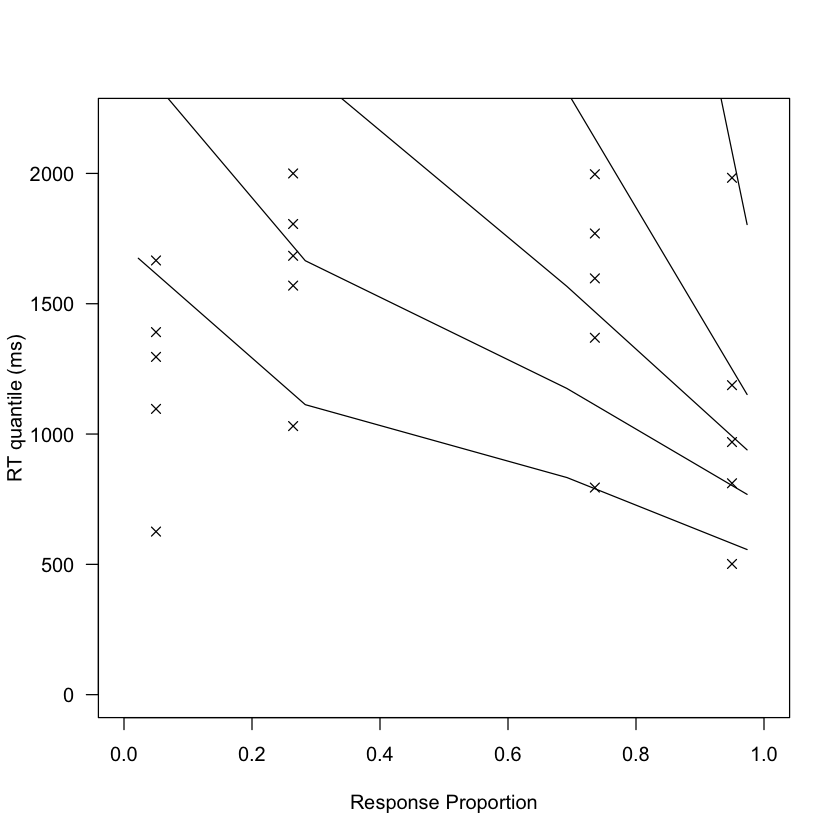

In [100]:
#Now let's try to fit the data just like we did before
#Now obtrain predictions from model for plotting
#First maximum proportion
vfitted=fit2rts$par[paste("v",1:nDiff,sep="")]
tfitted=fit2rts$par[paste("t0",1:nDiff,sep="")]
maxUp=pdiffusion(rep(Inf,length(vfitted)),response="upper",
                a=fit2rts$par["a"],
                v=vfitted,
                t0=tfitted,
                z=0.5*fit2rts$par["a"],
                d=0,
                sz=fit2rts$par["sz"],
                sv=fit2rts$par["sv"],
                st0=fit2rts$par["st0"],s=.1,precision=3)
maxLr=pdiffusion(rep(Inf,length(vfitted)),response="lower",
                a=fit2rts$par["a"],
                v=vfitted,
                t0=tfitted,
                z=0.5*fit2rts$par["a"],
                d=0,
                sz=fit2rts$par["sz"],
                sv=fit2rts$par["sv"],
                st0=fit2rts$par["st0"],s=.1,precision=3)

#Now the RT quantiles
forqpf2=matrix(0,length(qtiles),nDiff*2)
for (i in c(1:nDiff)){
    if(i==1){
        colIl=1
        colIu=4
        }
    else{
        colIl=2
        colIu=3
    }
    forqpf2[,colIl] = qdiffusion(qtiles*maxLr[i],
                     response="lower",
                      a=fit2rts$par["a"],
                      v=vfitted[i],
                      t0=tfitted[i],
                      z=0.5*fit2rts$par["a"],
                      d=0,
                      sz=fit2rts$par["sz"],
                      sv=fit2rts$par["sv"],
                      st0=fit2rts$par["st0"],s=.1,precision=3)*1000
    forqpf2[,colIu] = qdiffusion(qtiles*maxUp[i],
                     response="upper",
                      a=fit2rts$par["a"],
                      v=vfitted[i],
                      t0=tfitted[i],
                      z=0.5*fit2rts$par["a"],
                      d=0,
                      sz=fit2rts$par["sz"],
                      sv=fit2rts$par["sv"],
                      st0=fit2rts$par["st0"],s=.1,precision=3)*1000
}

plot(0,0,type="n",las=1,
    ylim=c(0,max(pfPlot)+200),
    xlim=c(0,1),
    xlab="Response Proportion",
    ylab="RT quantile (ms)")
apply(pfPlot,1,FUN=function(x) points(c(rev(pLow),pUp),x,pch=4) )
apply(forqpf2,1,FUN=function(x) lines(c(maxLr,rev(maxUp)),x))

In [101]:
forqpf2

1674.564,1112.867,832.9366,556.8036
2422.742,1665.217,1174.6679,768.5292
3699.422,2404.072,1566.1437,939.2324
5854.787,3825.491,2314.3240,1151.7604
NA,8389.145,5144.4073,1803.7791


In [105]:
#Alright, now let's fit the data we jsut generated.
LBAloglik=function(pars,rt,response){
    if (any(pars<0)) return(1e6+1e3*rnorm(1))
    ptrs=grep("v[1-9]",names(pars))
    eachn=length(rt)/length(ptrs)
    likelihoods=NULL
    
    for(i in c(1:length(ptrs))){
        likelihoods=c(likelihoods,tryCatch(dLBA(rt[((i-1)*eachn+1):(i*eachn)],
                                               response=response[((i-1)*eachn+1):(i*eachn)],
                                               A=pars["A"],
                                               b=pars["b"],
                                               t0=pars["t0"],
                                               mean_v=c(pars[ptrs[i]],
                                                       1-pars[ptrs[i]]),
                                               sd_v=c(pars["sv"],pars["sv"])),
                                          error=function(e) 0))
    }
    if (any(likelihoods==0)) return(1e6+1e3*rnorm(1))
    return(-sum(log(likelihoods)))
}

In [108]:
# Last thing
#Generate starting values for params
sparms=c(.7,.71,.35,.3+rnorm(2,0,0.5),.25)
names(sparms)=c("A","b","t0",paste("v",1:nDiff,sep=""),"sv")

fit2rts=optim(sparms,LBAloglik,gr=NULL,rt=dataNew$rt, response=dataNew$response)
round(fit2rts$par,3)

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results ba

A     b    t0    v1    v2    sv 
0.670 1.177 0.000 0.216 0.421 0.130

Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.
Results based on 2 accumulators/drift rates.


NULL

NULL

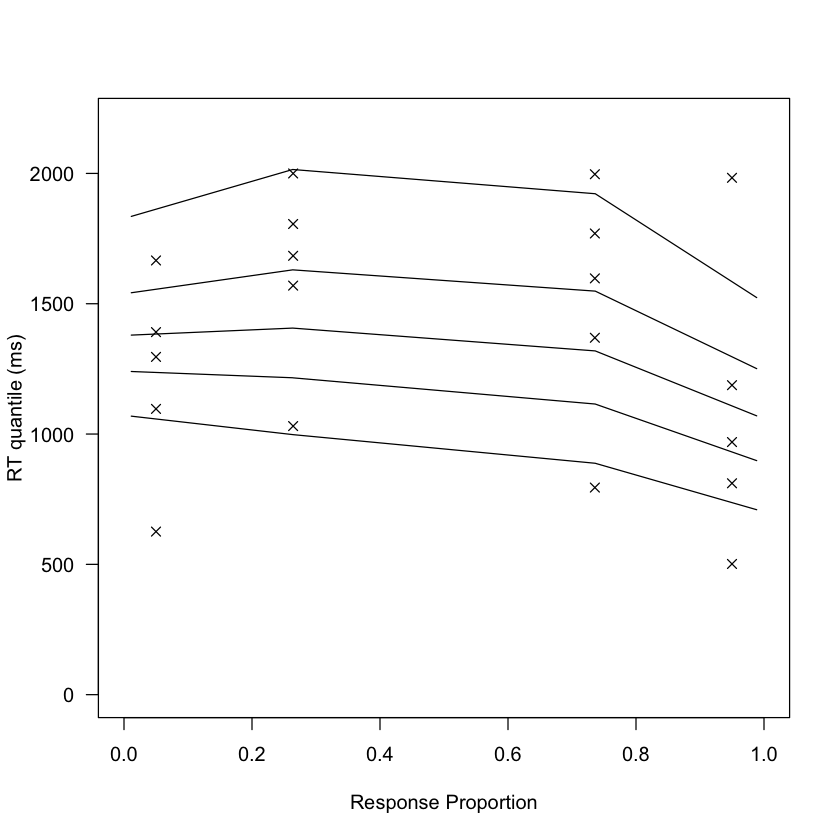

In [125]:
#Finally, we can plot these predictions to make sure that they 
#really fit the distribution of our data
vfitted=fit2rts$par[paste("v",1:nDiff,sep="")]
maxUp=vapply(vfitted, FUN=function(x) pLBA(100,response=2,
                                          A=fit2rts$par["A"],
                                          b=fit2rts$par["b"],
                                          t0=fit2rts$par["t0"],
                                          mean_v=c(x,1-x),
                                          sd_v=c(fit2rts$par["sv"],fit2rts$par["sv"])),
             numeric(1))
maxLr=1-maxUp

#Now the RT quantiles
forqpf2=matrix(0,length(qtiles),nDiff*2)
for (i in c(1:nDiff)){
    if(i==1){
        colIl=1
        colIu=4
        }
    else{
        colIl=2
        colIu=3
    }
    forqpf2[,colIl] = qLBA(qtiles*maxLr[i],
                     response=1,
                      A=fit2rts$par["A"],
                      b=fit2rts$par["b"],
                      t0=fit2rts$par["t0"],
                      mean_v=c(vfitted[i],1-vfitted[i]),
                       sd_v=c(fit2rts$par["sv"],fit2rts$par["sv"]))*1000
    forqpf2[,colIu] = qLBA(qtiles*maxUp[i],
                     response=2,
                      A=fit2rts$par["A"],
                      b=fit2rts$par["b"],
                      t0=fit2rts$par["t0"],
                      mean_v=c(vfitted[i],1-vfitted[i]),
                       sd_v=c(fit2rts$par["sv"],fit2rts$par["sv"]))*1000
}

plot(0,0,type="n",las=1,
    ylim=c(0,max(pfPlot)+200),
    xlim=c(0,1),
    xlab="Response Proportion",
    ylab="RT quantile (ms)")
apply(pfPlot,1,FUN=function(x) points(c(rev(pLow),pUp),x,pch=4) )
#apply(forqpf2,1,FUN=function(x) points(c(rev(pLow),pUp),x,pch=4) )
apply(forqpf2,1,FUN=function(x) lines(c(maxLr,rev(maxUp)),x))

In [123]:
#So neither model can fit my individual subject very well and I have no idea why. To be continued/

v1        v2 
0.2158745 0.4206697